In [1]:
import pandas as pd
import yfinance as yf
import sqlalchemy
import datetime as dt
from pandas.tseries.offsets import MonthEnd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

In [2]:
# url = 'https://en.wikipedia.org/wiki/List_of_BSE_SENSEX_companies''

tickerSensex = pd.read_csv('./data/BSE_Company_List.csv')
tickerSensex = tickerSensex.Symbol.to_list()

# tickers = []
# for ticker in tickerSensex:
#     ticker = ticker.replace('.', '-')
#     tickers.append(ticker)

#tickerSensex = tickerSensex.replace('.', '-')
tickerSensex[0:5]

['ASIANPAINT.BO',
 'AXISBANK.BO',
 'BAJAJ-AUTO.BO',
 'BAJFINANCE.BO',
 'BAJAJFINSV.BO']

In [3]:
# data = []

# for ticker in tickerSensex:
#     data.append(yf.download(ticker).reset_index())

In [4]:
# engine = sqlalchemy.create_engine('sqlite:///india.db')

In [5]:
# for frame, symbol in zip(data,tickerSensex):
#     frame.to_sql(symbol, engine, index = False)

In [6]:
# pd.read_sql(f'SELECT Date, "Adj Close" AS "{tickerSensex[0]}" FROM "ASIANPAINT.BO" LIMIT(10)', engine)

# Start Here

In [7]:
df = pd.DataFrame()
engine = sqlalchemy.create_engine('sqlite:///india.db')

for ticker in tickerSensex:
    df = df.append(pd.read_sql(
        f'SELECT Date, "Adj CLose" AS "{ticker}" FROM "{ticker}" WHERE DATE > "2007-01-10"'
        ,engine))

In [8]:
df = df.groupby('Date').sum() # Resets Index to the date
df.index = pd.to_datetime(df.index) # Sets Index Dates as Datetime objects
df.head()

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-10,62.436817,81.921684,0.0,32.834297,2604.056152,266.222595,696.785522,54.860710,249.344391,90.594536,...,67.110977,87.987556,0.0,284.154999,91.023743,79.072044,234.631042,342.602234,38.810364,970.902161
2007-01-11,63.016232,85.265244,0.0,32.825546,2659.520508,276.622253,711.390808,56.545277,248.658463,90.590019,...,69.383362,90.424095,0.0,289.031067,92.072571,81.715851,242.825378,361.730499,40.264267,995.855774
2007-01-12,62.285435,88.546722,0.0,32.549824,2668.338867,288.628510,728.198120,58.951141,259.094788,96.382469,...,69.938820,91.417488,0.0,299.062317,97.953201,82.902527,251.970276,374.665344,40.818893,1001.556763
2007-01-15,67.733917,94.710587,0.0,32.904324,2666.459229,287.238922,723.839050,58.616112,260.687225,98.965973,...,69.964088,90.572350,0.0,304.541016,97.837112,84.424240,252.464645,379.213898,41.053986,1043.660522
2007-01-16,67.889595,97.841293,0.0,34.142944,2674.024658,291.125244,727.209473,59.463070,254.766754,99.342171,...,69.661110,90.923241,0.0,300.602173,96.816315,83.758240,252.455231,367.152191,41.289078,1068.286865


# Visualizing Selected Tickers

## Line Plot of Adj Close Prices

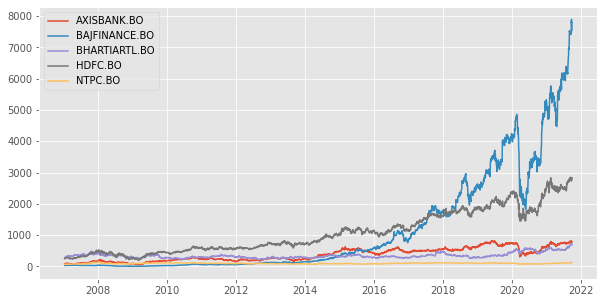

In [9]:
tickers_choice = ['AXISBANK.BO', 'BAJFINANCE.BO', 'BHARTIARTL.BO', 'HDFC.BO', 'NTPC.BO']
df_subset_vis = df[tickers_choice]

plt.figure(figsize = (10, 5))
plt.plot(df_subset_vis)
plt.legend(tickers_choice)


## Line Chart & Histogram of Percentage Change

In [10]:
df_returns = df_subset_vis.pct_change()
df_returns = df_returns.dropna()

In [11]:
np.sum(np.isinf(df_returns) == True)

AXISBANK.BO      0
BAJFINANCE.BO    1
BHARTIARTL.BO    0
HDFC.BO          0
NTPC.BO          0
dtype: int64

In [12]:
# Pulling outlier with Inf pct change
outlier_index = df_returns[np.isinf(df_returns['BAJFINANCE.BO']) == True].index
df_returns.loc[outlier_index, 'BAJFINANCE.BO'] = -1

In [13]:
# Replacing Inf with max negative pct_change so as to no lose information
np.min(df_returns)

AXISBANK.BO     -0.280145
BAJFINANCE.BO   -1.000000
BHARTIARTL.BO   -0.131822
HDFC.BO         -0.128656
NTPC.BO         -0.141515
dtype: float64

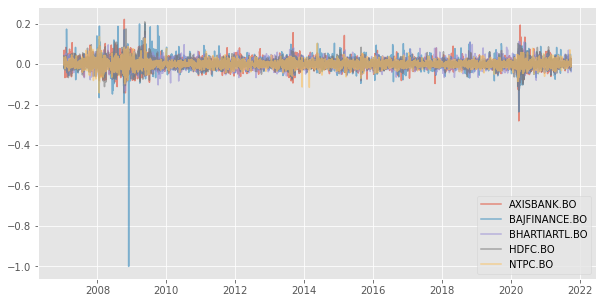

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(df_returns, alpha = 0.6)
plt.legend(tickers_choice)

(-0.2, 0.2)

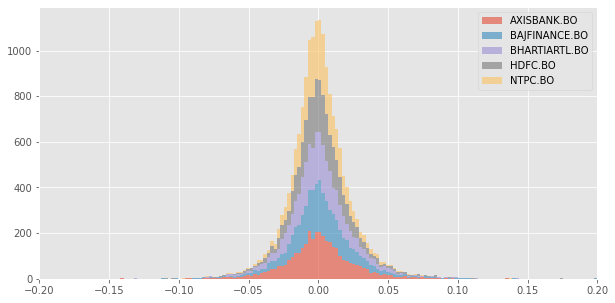

In [15]:
plt.figure(figsize = (10, 5))
plt.hist(df_returns, bins = 500, stacked = True, alpha = 0.6)
plt.legend(tickers_choice)
plt.xlim(-0.2, 0.2)

# Portfolio Optimization

In [16]:
def efficient_frontier(no_portfolios = 100, RF = 0 ):
    portfolio_returns = []
    portfolio_risk = []
    sharpe_ratio = []
    portfolio_weights = []
    #RF = 0.02
    df_returns_mean = df_returns.mean() * 252
    
    for portfolio in range(no_portfolios):
        # Generate Random Weights
        weights = np.random.random(len(tickers_choice))
        weights = np.round(weights / np.sum(weights), 3)
        portfolio_weights.append(weights)

        # Annualized Returns
        annualized_returns = np.sum(df_returns_mean * weights)
        portfolio_returns.append(annualized_returns)

        # Covariance Matrix & Portfolio Risk Calc
        matrix_covariance = df_returns.cov() * 252
        portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights))
        portfolio_std = np.sqrt(portfolio_variance)
        portfolio_risk.append(portfolio_std)

        # Sharpe Ratio
        sharpe = (annualized_returns - RF) / portfolio_std
        sharpe_ratio.append(sharpe)
    
    df_metrics = pd.DataFrame([np.array(portfolio_returns),
                            np.array(portfolio_risk),
                            np.array(sharpe_ratio),
                            np.array(portfolio_weights)], index = ['Returns', 'Risk', 'Sharpe_ratio', 'Weights'])

    df_metrics = df_metrics.T
    
    min_risk = df_metrics.iloc[df_metrics['Risk'].astype(float).idxmin()]

    max_return = df_metrics.iloc[df_metrics['Returns'].astype(float).idxmax()]

    max_sharpe = df_metrics.iloc[df_metrics['Sharpe_ratio'].astype(float).idxmax()]

    plt.figure(figsize = (10 ,5))
    plt.scatter(df_metrics['Risk'], df_metrics['Returns'], c = df_metrics['Sharpe_ratio'], cmap = 'magma')

    return min_risk, max_return, max_sharpe


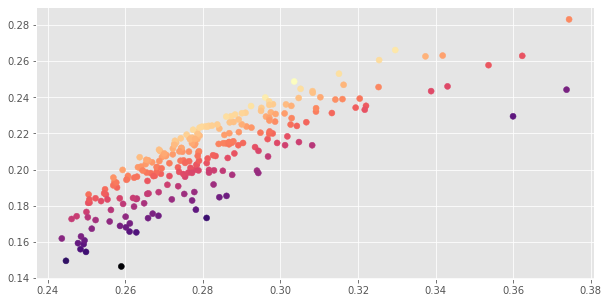

In [17]:
tmp = efficient_frontier(250, 0)

In [18]:
min_risk = pd.DataFrame({'Min Risk' : tmp[0]})
max_return = pd.DataFrame({'Max Return' : tmp[1]})
max_sharpe = pd.DataFrame({'Max Sharpe Ratio' : tmp[2]})

final_portfolios_df = pd.concat([min_risk, max_return, max_sharpe], axis = 1)

In [19]:
weights_df = pd.DataFrame(final_portfolios_df.loc['Weights'])
weights_df

,Weights
Min Risk,"[0.063, 0.077, 0.282, 0.222, 0.356]"
Max Return,"[0.342, 0.488, 0.021, 0.129, 0.02]"
Max Sharpe Ratio,"[0.255, 0.252, 0.095, 0.378, 0.02]"


In [20]:
final_portfolios_df.drop('Weights', axis = 0)

,Min Risk,Max Return,Max Sharpe Ratio
Returns,0.16179,0.283243,0.248807
Risk,0.243609,0.374437,0.303537
Sharpe_ratio,0.664136,0.756451,0.819692


In [21]:
wt_index = weights_df.index
wt_col = tickers_choice

In [22]:
tmp = []
for weight in weights_df['Weights']:
    tmp.append(str(weight).split())

tmp

[['[0.063', '0.077', '0.282', '0.222', '0.356]'],
 ['[0.342', '0.488', '0.021', '0.129', '0.02', ']'],
 ['[0.255', '0.252', '0.095', '0.378', '0.02', ']']]

In [23]:
tmp_min = (weights_df.iloc[0][0])
tmp_max = (weights_df.iloc[1][0])
tmp_sharpe = (weights_df.iloc[2][0])

tmp_port = pd.DataFrame([tmp_min, tmp_max, tmp_sharpe], columns = wt_col, index = wt_index)
tmp_port

,AXISBANK.BO,BAJFINANCE.BO,BHARTIARTL.BO,HDFC.BO,NTPC.BO
Min Risk,0.063,0.077,0.282,0.222,0.356
Max Return,0.342,0.488,0.021,0.129,0.020
Max Sharpe Ratio,0.255,0.252,0.095,0.378,0.020


In [24]:
tmp_min[0]

0.063

# Choice of Currenct using 'forex-python' package

In [25]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()

In [26]:
usd_amt = 100.45
gbp_amt = 100.45
inr_amt = 100.45

In [27]:
c.convert('INR', 'USD', inr_amt)

1.3514064397818477

In [28]:
c.convert('INR', 'USD', df_subset_vis)

,AXISBANK.BO,BAJFINANCE.BO,BHARTIARTL.BO,HDFC.BO,NTPC.BO
Date,,,,,
2007-01-10,1.102135,0.441737,3.581632,3.354561,0.902879
2007-01-11,1.147118,0.441619,3.721544,3.345332,0.933451
2007-01-12,1.191265,0.437910,3.883070,3.485738,0.940924
2007-01-15,1.274191,0.442679,3.864376,3.507162,0.941264
2007-01-16,1.316310,0.459343,3.916660,3.427511,0.937187
...,...,...,...,...,...
2021-09-22,10.606758,104.813039,9.597284,36.769153,1.673618
2021-09-23,10.928970,106.248532,9.590021,37.911356,1.696489
2021-09-24,10.738603,104.862143,9.761696,38.187153,1.672946


In [29]:
df_subset_vis.index

DatetimeIndex(['2007-01-10', '2007-01-11', '2007-01-12', '2007-01-15',
               '2007-01-16', '2007-01-17', '2007-01-18', '2007-01-19',
               '2007-01-22', '2007-01-23',
               ...
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20',
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-27', '2021-09-28'],
              dtype='datetime64[ns]', name='Date', length=3620, freq=None)

# Fitting Distribution to Data

In [30]:
from fitter import Fitter

In [31]:
f = Fitter(data = df_returns['AXISBANK.BO'], distributions = ['norm', 't', 'nct', 'beta'])

In [32]:
a = f.fit()

In [33]:
a

In [34]:
a = f.summary(plot = False, method = 'bic')

In [35]:
a

,sumsquare_error,aic,bic,kl_div
nct,16.846525,501.242297,-19400.561561,inf
t,19.501661,489.176681,-18879.096018,inf
beta,203.677631,2647.264103,-10380.587336,inf
norm,204.636131,2582.728050,-10379.984295,inf


In [36]:
param = f.fitted_param['beta']

In [37]:
param

(8485.559037708663,
 38856.446369053796,
 -2.6928656337684993,
 15.029245272006857)

In [38]:
from scipy.stats import norm,t, nct

In [39]:
data = df_returns['AXISBANK.BO']

In [40]:
np.min(data)

-0.2801447374579952

In [41]:
np.max(data)

0.22216183542921786

In [42]:
len(data)

3619

In [43]:
# distribution fitting
def distribution_fitting(data, dist = 'norm'):

    x_quantile = np.linspace(np.min(data), np.max(data), len(data))

    if dist == 'norm':
        param = f.fitted_param[dist]
        a_tmp = norm.pdf(x_quantile, loc = param[0], scale = param[1])
    
    elif dist == 't':
        param = f.fitted_param[dist]
        a_tmp = t.pdf(x_quantile, param[0], param[1], param[2])

    elif dist == 'nct':
        param = f.fitted_param[dist]
        a_tmp = nct.pdf(x_quantile, param[0], param[1], param[2], param[3])
    

    plt.hist(data, bins = 100,  density = True)
    plt.plot(x_quantile, a_tmp, color = 'black')

    return x_quantile, a_tmp
    

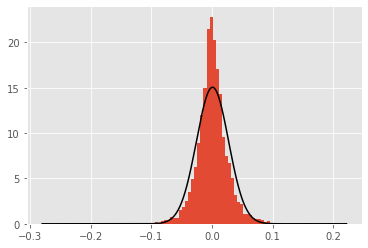

In [44]:

tmp = distribution_fitting(df_returns['AXISBANK.BO'], 'norm')

In [45]:
tmp

(array([-0.28014474, -0.2800059 , -0.27986707, ...,  0.22188416,
         0.222023  ,  0.22216184]),
 array([5.56393725e-24, 5.88177708e-24, 6.21760287e-24, ...,
        1.23311027e-14, 1.18040950e-14, 1.12993006e-14]))

# Display Financial Data for Tickers

In [46]:
col_Names = df_subset_vis.columns
col_Names

Index(['AXISBANK.BO', 'BAJFINANCE.BO', 'BHARTIARTL.BO', 'HDFC.BO', 'NTPC.BO'], dtype='object')

In [47]:
ticker_info = yf.Ticker(col_Names[2])
ticker_info

yfinance.Ticker object <BHARTIARTL.BO>

In [48]:
ticker_info.quarterly_balance_sheet

,2020-06-30,2020-03-31,2019-12-31,2019-09-30
Intangible Assets,1.142479e+12,8.125920e+11,1.159315e+12,8.326760e+11
Total Liab,2.662899e+12,2.586495e+12,2.603054e+12,2.486077e+12
Total Stockholder Equity,6.099020e+11,7.714480e+11,6.882870e+11,6.998330e+11
Minority Interest,2.485440e+11,2.498470e+11,2.229180e+11,1.703160e+11
Other Current Liab,8.038810e+11,6.762900e+11,7.476720e+11,2.815840e+11
Total Assets,3.521345e+12,3.607790e+12,3.514259e+12,3.356226e+12
Common Stock,6.099020e+11,2.727800e+10,2.566000e+10,2.566000e+10
Other Current Assets,2.039290e+11,2.793610e+11,1.637950e+11,1.538970e+11
Other Liab,1.307150e+11,1.171490e+11,9.607500e+10,1.026050e+11
Other Assets,3.266630e+11,3.888780e+11,3.362240e+11,3.321190e+11


In [49]:
ticker_info.quarterly_financials

,2020-06-30,2020-03-31,2019-12-31,2019-09-30
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,-113737000000.0,-70105000000.0,-15028000000.0,-313340000000.0
Minority Interest,248544000000.0,249847000000.0,222918000000.0,170316000000.0
Net Income,-159331000000.0,-52370000000.0,-10353000000.0,-230449000000.0
Selling General Administrative,7301000000.0,9355000000.0,9003000000.0,7581000000.0
Gross Profit,128748000000.0,127419000000.0,116445000000.0,109684000000.0
Ebit,32553000000.0,32475000000.0,24006000000.0,19929000000.0
Operating Income,32553000000.0,32475000000.0,24006000000.0,19929000000.0
Other Operating Expenses,16626000000.0,14342000000.0,14028000000.0,12823000000.0


In [50]:
ticker_info.quarterly_cashflow

,2020-06-30,2020-03-31,2019-12-31,2019-09-30
Investments,-5.880000e+08,5.852700e+10,-1.324850e+11,-2.412000e+09
Change To Liabilities,1.108500e+10,-1.562900e+10,2.332500e+10,-1.649800e+10
Total Cashflows From Investing Activities,-4.925000e+10,-1.864000e+09,-1.899450e+11,-4.346000e+10
Net Borrowings,-4.062100e+10,4.844400e+10,7.644900e+10,-9.262000e+09
Total Cash From Financing Activities,-6.767000e+10,1.075220e+11,7.545300e+10,2.737000e+10
Change To Operating Activities,2.318000e+10,-1.682860e+11,1.225000e+09,3.181000e+09
Net Income,-1.593310e+11,-5.237000e+10,-1.035300e+10,-2.304490e+11
Change In Cash,-1.045000e+09,3.265400e+10,-2.849000e+09,5.128500e+10
Repurchase Of Stock,-2.100000e+07,-5.000000e+06,-4.110000e+08,-1.000000e+06
Effect Of Exchange Rate,-3.640000e+08,6.477000e+09,-2.000000e+06,2.560000e+09


In [51]:
ticker_info.actions

,Dividends,Stock Splits
Date,,
2009-07-24,0.901093,2.0
2010-08-18,0.901093,0.0
2011-08-17,0.901093,0.0
2012-08-16,0.901093,0.0
2013-05-23,0.901093,0.0
2014-08-21,1.468782,0.0
2015-08-13,2.000427,0.0
2016-08-11,1.225487,0.0
2017-07-13,0.901093,0.0


# VAR

In [52]:
def var_historic(r, level=1):
    """
    Takes in a series of returns (r), and the percentage level
(level)
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [53]:
var_historic(df_returns['AXISBANK.BO'], level = 95)

-0.043033137186864495

In [55]:
# distribution fitting
def distribution_fitting(data, dist = 'norm', conf_interval = 0.9999):

    x_quantile = np.linspace(np.min(data), np.max(data), len(data))

    if dist == 'norm':
        param = f.fitted_param[dist]
        a_tmp = norm.pdf(x_quantile, loc = param[0], scale = param[1])
        # var = 
    
    elif dist == 't':
        param = f.fitted_param[dist]
        a_tmp = t.pdf(x_quantile, param[0], param[1], param[2])

    elif dist == 'nct':
        param = f.fitted_param[dist]
        a_tmp = nct.pdf(x_quantile, param[0], param[1], param[2], param[3])
    

    plt.hist(data, bins = 100,  density = True)
    plt.plot(x_quantile, a_tmp, color = 'black')

    return x_quantile, a_tmp
    

# BSM Estimation of Price Fluctuations

In [110]:
def bsm_estimation_price(data, T = 1, change = 10):
    # r = np.mean(data) * T
    r = 0.02 * T

    #sigma = np.std(data) * T
    sigma = 0.15 * T

    K = data[-1]
    S = K * (1 + (change/100))
    # S_down = K * 0.9

    d1 = (sigma * np.sqrt(T)) ** -1 * ((np.log(S/K)) + (r + 0.5 * sigma ** 2) * T)
    d2 = d1 - sigma * np.sqrt(T)

    d1 = norm.pdf(d1, r,sigma) * 100
    d2 = norm.pdf(d2, r,sigma) * 100

    return r, sigma, K, S, d1, d2





In [118]:
bsm_estimation_price(df_subset_vis['AXISBANK.BO'], T = 5, change = 50)

(0.1,
 0.75,
 788.9500122070312,
 1183.4250183105469,
 12.442332682739982,
 46.18605603788807)